### Credit to http://cs231n.github.io/neural-networks-case-study/

### Imports

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

### Generate data

In [2]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D), dtype='float32') # data matrix (each row = single example)
y = np.zeros(N*K, dtype='int32') # class labels

In [3]:
for j in xrange(K):
    indices = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[indices] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[indices] = j

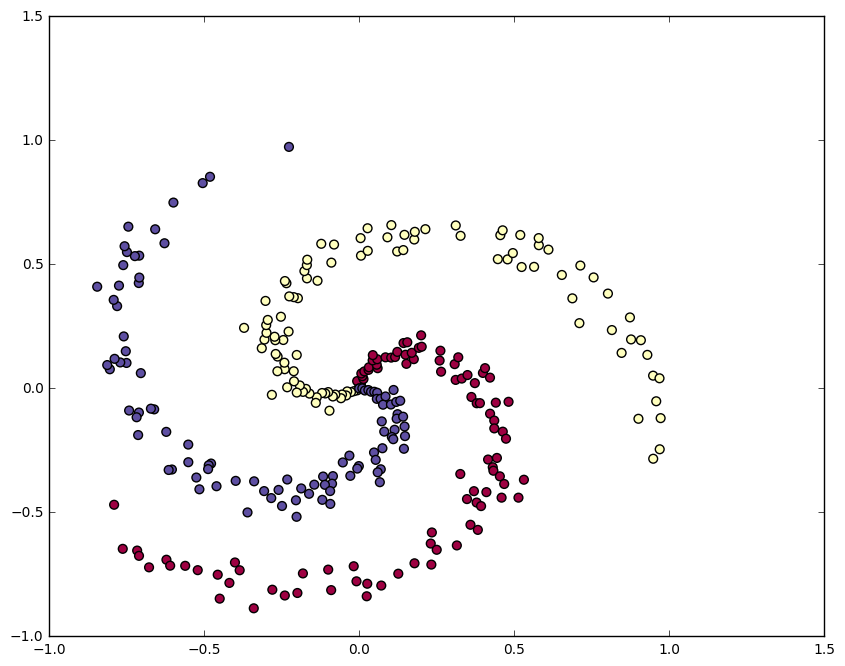

In [4]:
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)

### Train a Softmax classifier (identical to a neural network that has a single neuron with softmax as its activation function)

In [5]:
#Train a Linear Classifier

# initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in xrange(200):
  
    # evaluate class scores, [N x K]
    scores = np.dot(X, W) + b 

    # compute the class probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

    # compute the loss: average cross-entropy loss and regularization
    corect_logprobs = -np.log(probs[range(num_examples),y])
    data_loss = np.sum(corect_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(W*W)
    loss = data_loss + reg_loss
    if i % 10 == 0:
        print "iteration %d: loss %f" % (i, loss)

    # compute the gradient on scores
    dscores = probs
    dscores[range(num_examples),y] -= 1
    dscores /= num_examples

    # backpropate the gradient to the parameters (W,b)
    dW = np.dot(X.T, dscores)
    db = np.sum(dscores, axis=0, keepdims=True)

    dW += reg*W # regularization gradient

    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db

iteration 0: loss 1.099515
iteration 10: loss 0.914060
iteration 20: loss 0.845192
iteration 30: loss 0.813979
iteration 40: loss 0.797805
iteration 50: loss 0.788650
iteration 60: loss 0.783143
iteration 70: loss 0.779681
iteration 80: loss 0.777432
iteration 90: loss 0.775934
iteration 100: loss 0.774916
iteration 110: loss 0.774213
iteration 120: loss 0.773723
iteration 130: loss 0.773376
iteration 140: loss 0.773129
iteration 150: loss 0.772952
iteration 160: loss 0.772825
iteration 170: loss 0.772732
iteration 180: loss 0.772665
iteration 190: loss 0.772616


### Evaluate training set accuracy

In [6]:
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print 'training accuracy: %.2f' % (np.mean(predicted_class == y))

training accuracy: 0.51


### Plot decision boundary

(-1.8865100741386414, 1.9734899258613621)

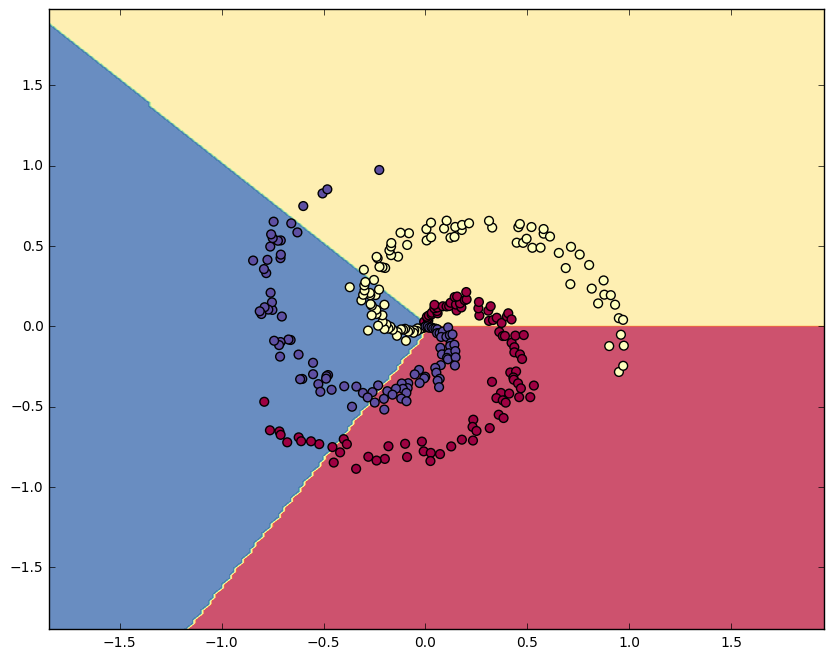

In [7]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

### Train a Neural Network with a 1 hidden layer

In [8]:
num_hidden_nodes = 100

# initialize parameters randomly
W = 0.01 * np.random.randn(D,num_hidden_nodes)
b = np.zeros((1,num_hidden_nodes))
num_examples = X.shape[0]
W_h = 0.01 * np.random.randn(num_hidden_nodes,K)
b_h = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
for i in xrange(10000):
    # evaluate class scores
    hidden_scores = np.dot(X, W) + b

    # compute the relu activations
    hidden_scores[hidden_scores <= 0] = 0

    final_scores = np.dot(hidden_scores, W_h) + b_h
    final_exp_scores = np.exp(final_scores)
    final_probs = final_exp_scores / np.sum(final_exp_scores, axis=1, keepdims=True)

    # compute the loss: average cross-entropy loss and regularization
    correct_logprobs = -np.log(final_probs[range(num_examples),y])
    data_loss = np.sum(correct_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W_h*W_h)
    loss = data_loss + reg_loss
    if i % 1000 == 0:
        print "iteration %d: loss %f" % (i, loss)

    # compute the gradient on scores
    dscores = final_probs
    dscores[range(num_examples),y] -= 1
    dscores /= num_examples

    # backpropagate the gradient to the hidden layer parameters
    dWh = np.dot(hidden_scores.T, dscores)
    dhb = np.sum(dscores, axis=0, keepdims=True)
    # backpropagate the gradient to the hidden layer (W,b)
    dh = np.dot(dscores, W_h.T)

    # backpropagate to the first layer
    dh[hidden_scores <= 0] = 0

    dW = np.dot(X.T,dh)
    db = np.sum(dh, axis=0, keepdims=True)

    # regularization gradient
    dW += reg*W 
    dWh += reg*W_h

    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    W_h += -step_size * dWh
    b_h += -step_size * dhb

iteration 0: loss 1.098598
iteration 1000: loss 0.296798
iteration 2000: loss 0.259535
iteration 3000: loss 0.253737
iteration 4000: loss 0.248625
iteration 5000: loss 0.246974
iteration 6000: loss 0.246430
iteration 7000: loss 0.246310
iteration 8000: loss 0.246243
iteration 9000: loss 0.246188


### Evaluate training set accuracy

In [9]:
hidden_scores = np.maximum(0, np.dot(X, W) + b)
final_scores = np.dot(hidden_scores, W_h) + b_h
predictions = np.argmax(final_scores, axis=1)
print 'training accuracy: %.2f' % (np.mean(predictions == y))

training accuracy: 0.98


### Plot the decision boundary

(-1.8865100741386414, 1.9734899258613621)

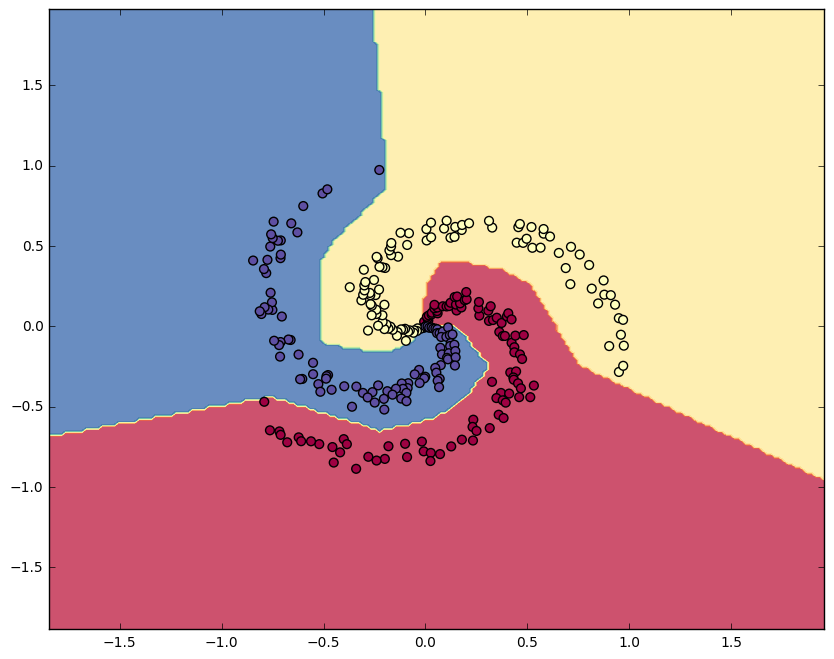

In [10]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W_h) + b_h
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())